# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

### <span style="color:blue"> Svolgimento dell'esercizio 02.1


Per calcolare il valore dell'integrale utilizzo il metodo del valore medio, basato sul teorema del valor medio integrale:

$$I = \int_a^b f(x) dx = \lim_{N \rightarrow +\infty} \sum_{i=1}^{N} \Delta x \cdot f(x_{i}) = \frac{b-a}{N} \cdot \sum_{i=1}^{N} f(x_{i}) = (b-a) \cdot <f>_{[a,b]}$$

campioniamo quindi una variabile x, distribuita nell'intervallo (a,b), e calcoliamo l'integrale come il valor medio dei valori che la funzione assume nei punti x campionati moltiplicato per la lunghezza dell'intervallo.

Il primo dei grafici seguenti è prodotto stimando l'integrale con questo metodo, campionando la variabile x in modo uniforme.

Questo metodo approssima la funzione con una retta orizzontale pari al valor medio che la funzione assume nell'intervallo. Per aumentare la precisione della stima dell'integrale, con questo metodo, occorre aumentare il numero di campionamenti della variabile, per migliorare la stima del valor medio della funzione a spese di tempo computazionale.

Un altro metodo per migliorare il calcolo del valore dell'integrale consiste nel campionare la variabile x, per la stima del valore medio, in modo non uniforme, ma secondo una funzione che approssima l'integranda.

$$I = \int_a^b f(x) dx = \int_a^b \frac{f(x) \cdot p(x)}{p(x)} dx$$

scegliendo $p(x) = \frac{1}{b-a}$, uniforme, ci si riduce al caso precedente.

Questo metodo, chiamato importance sampling, consiste nello scegliere una funzione $p(x)$ che abbia un andamento simile alla funzione da integrare $f(x)$, e campionare la variabile x secondo la distribuzione scelta $p(x)$; la funzione $p(x)$ deve quindi rispettare le proprietà di una probability distribution function, ovvero essere normalizzata a 1 ed essere sempre positiva; una volta campionata la variabile x con pdf $p(x)$, si calcola, col metodo del valor medio, l'integrale della funzione $g(x) = \frac{f(x)}{p(x)}$.

Il secondo grafico è prodotto con questo secondo metodo.

La funzione $p(x)$ scelta per approssimare la funzione integranda è

$$ p(x) \propto (1 - x^2) = \frac{3}{2} \cdot (1 - x^2)$$

proporzionale allo sviluppo in serie di Taylor al secondo ordine della funzione integranda. Non ho scelto lo sviluppo in serie esatto poichè diventa minore di 0 nell'intervallo (0,1); la costante di proporzionalità è calcolata dalla normalizzazione.

Il codice che ho sviluppato calcola l'integrale col metodo del valor medio per un campionamento uniforme e per un campionamento secondo la pdf $p(x)$; i grafici che rappresentano, per entrambi i campionamenti, il valor medio dell'integrale in funzione del numero di stime mostrano che il risultato ottenuto con l'importance sampling è migliore ed affetto da un errore minore.

#### Codice

Il codice utilizzato per lo svolgimento dell'esercizio è contenuto nella cartella integral; comprende:

- un makefile per l'esecuzione (make clean elimina anche i file txt di output);

- Primes, seed.in : servono per il funzionamento del generatore di numeri casuali;

- classe virtuale funzionebase: la utilizzo come classe per passare, in modo generico, delle funzioni particolari ai metodi delle altre classi; implementa i metodi virtuali per valutare la funzione, il suo massimo, e la pdf che viene associata per un importance sampling;

- classe coseno_es2: eredita, ed implementa per svolgere questo esercizio, i metodi di funzionebase;

- classe Random: è il generatore di numeri casuali, modificato per produrre, col metodo di reiezione, distribuzioni di numeri casuali che seguono una qualsiasi funzione, o la pdf per l'importance sampling che scelgo di associargli.

- classe integral: implementa metodi per il calcolo di un integrale in un dominio (a, b) (data_membri privati e impostabili); i due metodi di integrazione che ho implementato per ora ricevono ad argomenti una funzionebase, un oggetto Random e il numero di punti da utilizzare per la stima integrale col metodo del valor medio della funzione. Il primo dei due esegue la stima con un sampling uniforme, il secondo con importance sampling.

- un main, che esegue le stime e produce gli output richiesti, che espongo di seguito:

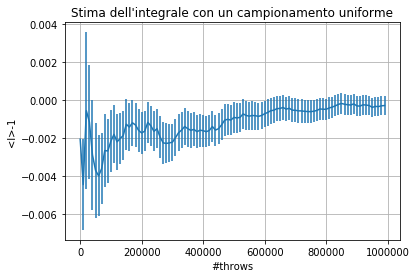

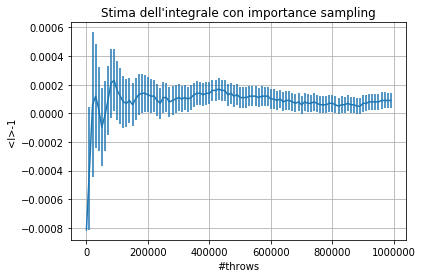

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 10000        #numero di punti utilizzati per ogni stima dell'integrale
N = 100          #numero di stime dell'integrale
mean = np.loadtxt("integral_mean_value.txt")
std = np.loadtxt("integral_sigma_mean.txt")
mean2 = np.loadtxt("non_uniform_integral_mean.txt")
std2 = np.loadtxt("non_uniform_integral_sigma_mean.txt")
x = np.arange(N)
x*=M

plt.errorbar(x,mean-1,yerr=std)
plt.title("Stima dell'integrale con un campionamento uniforme")
plt.xlabel('#throws')
plt.ylabel('<I>-1')
plt.grid(True)
plt.show()

plt.errorbar(x,mean2-1,yerr=std2)
plt.title("Stima dell'integrale con importance sampling")
plt.xlabel('#throws')
plt.ylabel('<I>-1')
plt.grid(True)
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

#### Commenti

Il random walk, sia in un lattice sia nello spazio, è un processo stocastico a media nulla: il valor medio della posizione finale è sempre uguale a 0;

$$ <\vec{r}_{N}>_{RW} = 0 $$

Il valore rms cresce invece in maniera lineare nel tempo:

$$\langle |\vec{r}_N|^2 \rangle_{RW} = 2Dt$$

D: costante di diffusione; se $\lambda$ è la lunghezza percorsa, in una qualsiasi direzione, ad ogni step, e $\tau$ è la durata temporale di uno step, vale $$ D = \frac{\lambda^2}{2\tau}$$

abbiamo quindi

$$\langle |\vec{r}_N|^2 \rangle_{RW} = 2Dt = 2 \cdot \frac{\lambda^2}{2\tau} \cdot t = \lambda^2 \cdot N$$

dove $ N = \frac{t}{\tau} $ è il numero di step; se il random walk è un fenomeno diffusivo, per step di $\lambda = 1$, avremmo quindi:

$$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} = \sqrt{N}$$

#### Codice

Il codice utilizzato, contenuto nella cartella random_walk, comprende:

-classe random: sempre la stessa

-classe random_walk: contiene come datamembri private:

    -un vettore di coordinate, che rappresentano le coordinate della particella
    -il numero di step del random walk
    
e come metodi public:

    -costruttore a partire dal numero di step
    -metodi che restituiscono il valore delle coordinate
    -metodo per azzerare le coordinate (mettere la particella nell'origine)
    -2 metodi che implementano il random walk in un lattice di una certa spaziatura e nello spazio 3D con spostamenti di modulo costante in direzione qualunque; i metodi eseguono un numero di step pari al datamembro e ad ogni step salvano il nuovo valore della coordinata (dal main si può accedere ai valori delle coordinate prima di riportare la particella nell'origine e ripetere il random walk).
    
-main: per un numero di step da 1 a 100, ripete 10000 volte il random walk e calcola il valore medio del valore rms della posizione finale e l'incertezza statistica associata, per entrambi i tipi di RW richiesti

Di seguito produco i grafici

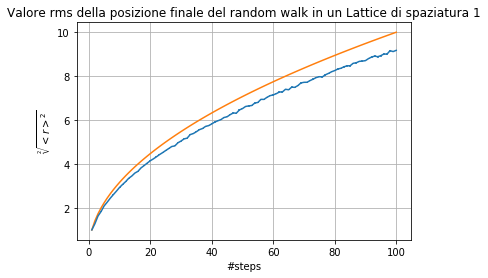

In [20]:
mean = np.loadtxt("Lattice_RW_mean.txt")
std = np.loadtxt("Lattice_RW_sigma.txt")

x = np.arange(N)
x += 1
f = np.sqrt(x)

plt.errorbar(x,mean,yerr=std)
plt.plot(x,f)
plt.title("Valore rms della posizione finale del random walk in un Lattice di spaziatura 1")
plt.xlabel('#steps')
plt.ylabel("$\sqrt[2]{<r>^2}$")
plt.grid(True)
plt.show()

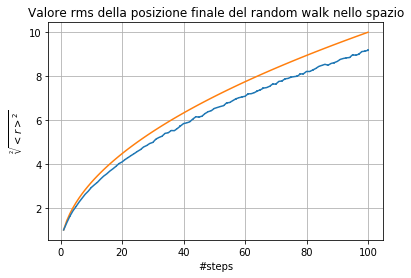

In [17]:
mean2 = np.loadtxt("Space_RW_mean.txt")
std2 = np.loadtxt("Space_RW_sigma.txt")

plt.errorbar(x,mean2,yerr=std2)
plt.plot(x,f)
plt.title("Valore rms della posizione finale del random walk nello spazio")
plt.xlabel('#steps')
plt.ylabel("$\sqrt[2]{<r>^2}$")
plt.grid(True)
plt.show()

l'andamento come radice del numero di step è mostrato nei due grafici; il valore tende appunto a 10 per entrambe le simulazioni.